# **T1** : Convulational Autoencoder for MNIST dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.3267 - val_loss: 0.1430
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1339 - val_loss: 0.1124
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1100 - val_loss: 0.1009
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1007 - val_loss: 0.0954
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0955 - val_loss: 0.0917
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0924 - val_loss: 0.0890
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0897 - val_loss: 0.0870
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0877 - val_loss: 0.0853
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0861 - val_loss: 0.0841
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0845 - val_loss: 0.0830
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0836 - val_loss: 0.0818


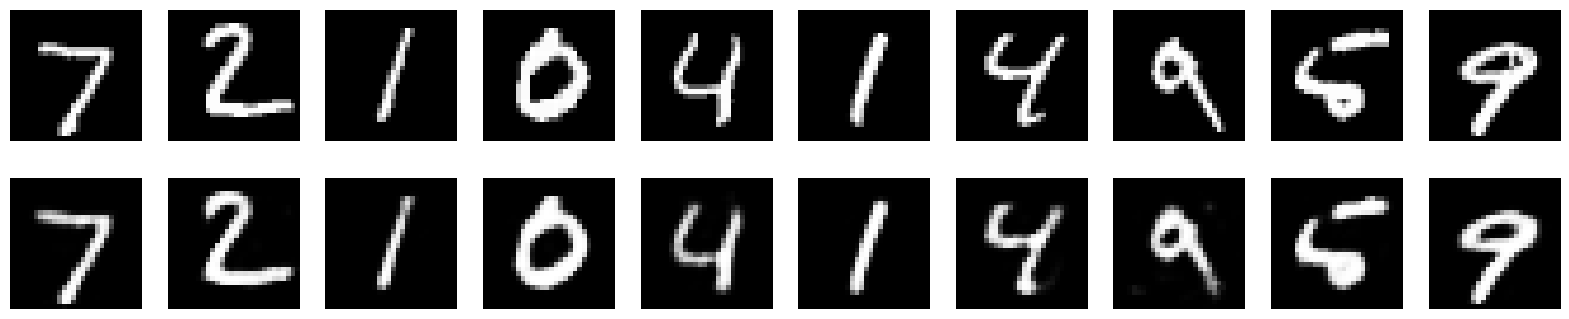

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

# 1. Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

# 2. Build the Autoencoder
encoding_dim = 64  # size of the latent space

# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# 3. Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# 4. Train the model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 5. Test the model
decoded_imgs = autoencoder.predict(x_test)

# 6. Visualize original vs reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

# **T2** : Convulational Variational Autoencoder for MNIST Dataset

TensorFlow version: 2.19.0
GPU available: True /device:GPU:0
Train / Val / Test shapes: (54000, 28, 28, 1) (6000, 28, 28, 1) (10000, 28, 28, 1)

Running experiment: lr=0.001, optimizer=adam, recon=bce, beta=1.0
Epoch 1/12
422/422 - 14s - 33ms/step - kl_loss: 10.5513 - loss: 187.3865 - recon_loss: 176.8352 - val_kl_loss: 17.5040 - val_loss: 130.3888 - val_recon_loss: 112.8848
Epoch 2/12
422/422 - 3s - 7ms/step - kl_loss: 19.3501 - loss: 119.7860 - recon_loss: 100.4359 - val_kl_loss: 20.4530 - val_loss: 110.8091 - val_recon_loss: 90.3561
Epoch 3/12
422/422 - 5s - 12ms/step - kl_loss: 20.8937 - loss: 109.7831 - recon_loss: 88.8894 - val_kl_loss: 21.4672 - val_loss: 106.2835 - val_recon_loss: 84.8163
Epoch 4/12
422/422 - 3s - 7ms/step - kl_loss: 21.6621 - loss: 106.5666 - recon_loss: 84.9045 - val_kl_loss: 21.7772 - val_loss: 103.4723 - val_recon_loss: 81.6951
Epoch 5/12
422/422 - 3s - 7ms/step - kl_loss: 22.0521 - loss: 104.7078 - recon_loss: 82.6557 - val_kl_loss: 22.9237 - val_loss: 102

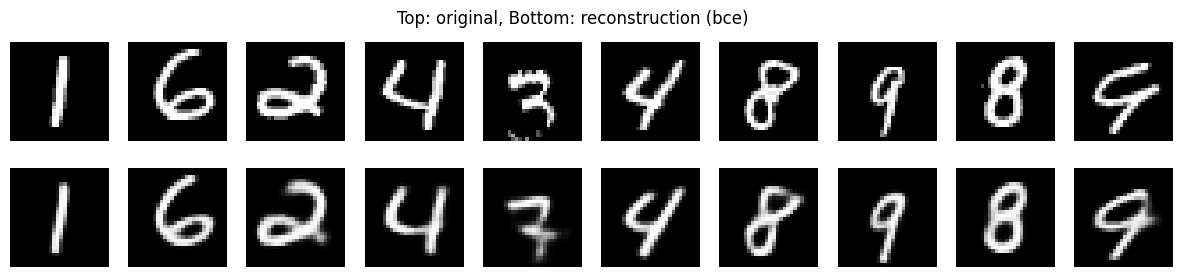

Experiment done in 57.4s

Running experiment: lr=0.001, optimizer=adam, recon=mse, beta=1.0
Epoch 1/12
422/422 - 12s - 27ms/step - kl_loss: 3.1252 - loss: 54.2853 - recon_loss: 51.1601 - val_kl_loss: 8.6868 - val_loss: 38.7039 - val_recon_loss: 30.0171
Epoch 2/12
422/422 - 3s - 7ms/step - kl_loss: 9.1808 - loss: 34.4549 - recon_loss: 25.2741 - val_kl_loss: 9.8333 - val_loss: 31.8329 - val_recon_loss: 21.9996
Epoch 3/12
422/422 - 3s - 6ms/step - kl_loss: 10.1175 - loss: 31.7638 - recon_loss: 21.6462 - val_kl_loss: 10.9115 - val_loss: 30.5780 - val_recon_loss: 19.6665
Epoch 4/12
422/422 - 3s - 7ms/step - kl_loss: 10.6452 - loss: 30.7691 - recon_loss: 20.1239 - val_kl_loss: 11.0908 - val_loss: 29.8307 - val_recon_loss: 18.7399
Epoch 5/12
422/422 - 3s - 7ms/step - kl_loss: 11.0198 - loss: 30.1032 - recon_loss: 19.0834 - val_kl_loss: 11.8237 - val_loss: 29.2532 - val_recon_loss: 17.4295
Epoch 6/12
422/422 - 5s - 12ms/step - kl_loss: 11.3005 - loss: 29.6161 - recon_loss: 18.3156 - val_kl_los

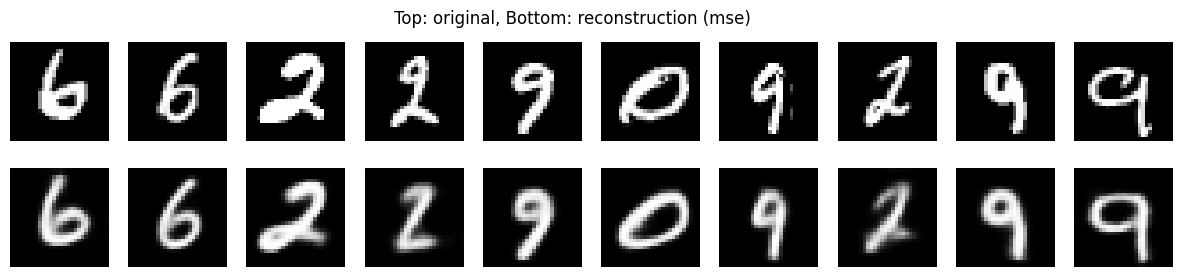

Experiment done in 55.2s

Running experiment: lr=0.0005, optimizer=adam, recon=bce, beta=1.0
Epoch 1/12
422/422 - 15s - 36ms/step - kl_loss: 7.6474 - loss: 219.2765 - recon_loss: 211.6291 - val_kl_loss: 13.5098 - val_loss: 160.0058 - val_recon_loss: 146.4960
Epoch 2/12
422/422 - 11s - 25ms/step - kl_loss: 17.6566 - loss: 134.4592 - recon_loss: 116.8026 - val_kl_loss: 19.8149 - val_loss: 121.1687 - val_recon_loss: 101.3538
Epoch 3/12
422/422 - 3s - 7ms/step - kl_loss: 20.4813 - loss: 116.3738 - recon_loss: 95.8924 - val_kl_loss: 21.4605 - val_loss: 110.7819 - val_recon_loss: 89.3214
Epoch 4/12
422/422 - 3s - 7ms/step - kl_loss: 21.3190 - loss: 110.6881 - recon_loss: 89.3692 - val_kl_loss: 21.7201 - val_loss: 107.5660 - val_recon_loss: 85.8459
Epoch 5/12
422/422 - 5s - 12ms/step - kl_loss: 21.7365 - loss: 108.1126 - recon_loss: 86.3760 - val_kl_loss: 22.1830 - val_loss: 105.3442 - val_recon_loss: 83.1613
Epoch 6/12
422/422 - 5s - 12ms/step - kl_loss: 22.0555 - loss: 106.5079 - recon_loss

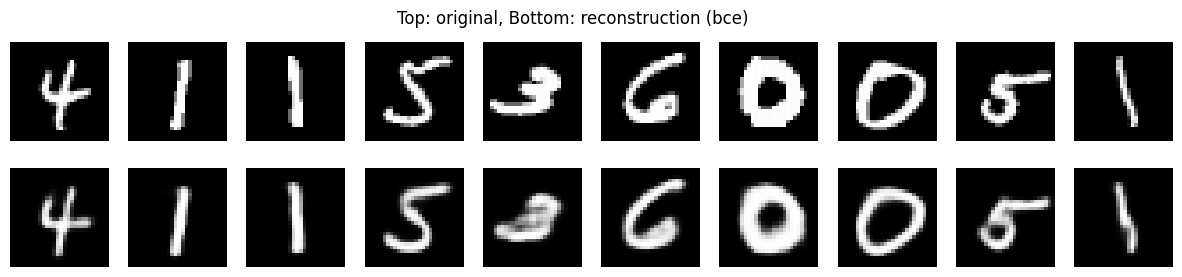

Experiment done in 69.7s

Running experiment: lr=0.0005, optimizer=adam, recon=mse, beta=1.0
Epoch 1/12
422/422 - 12s - 28ms/step - kl_loss: 2.3499 - loss: 61.1303 - recon_loss: 58.7804 - val_kl_loss: 5.7210 - val_loss: 44.6415 - val_recon_loss: 38.9205
Epoch 2/12
422/422 - 3s - 7ms/step - kl_loss: 8.2327 - loss: 37.3098 - recon_loss: 29.0771 - val_kl_loss: 10.1887 - val_loss: 33.5324 - val_recon_loss: 23.3437
Epoch 3/12
422/422 - 3s - 7ms/step - kl_loss: 9.8771 - loss: 33.0543 - recon_loss: 23.1773 - val_kl_loss: 10.6568 - val_loss: 30.8416 - val_recon_loss: 20.1848
Epoch 4/12
422/422 - 3s - 7ms/step - kl_loss: 10.5850 - loss: 31.6889 - recon_loss: 21.1040 - val_kl_loss: 11.4186 - val_loss: 30.9049 - val_recon_loss: 19.4863
Epoch 5/12
422/422 - 3s - 7ms/step - kl_loss: 10.9928 - loss: 30.8973 - recon_loss: 19.9045 - val_kl_loss: 11.4554 - val_loss: 29.8080 - val_recon_loss: 18.3525
Epoch 6/12
422/422 - 3s - 7ms/step - kl_loss: 11.2729 - loss: 30.3680 - recon_loss: 19.0951 - val_kl_los

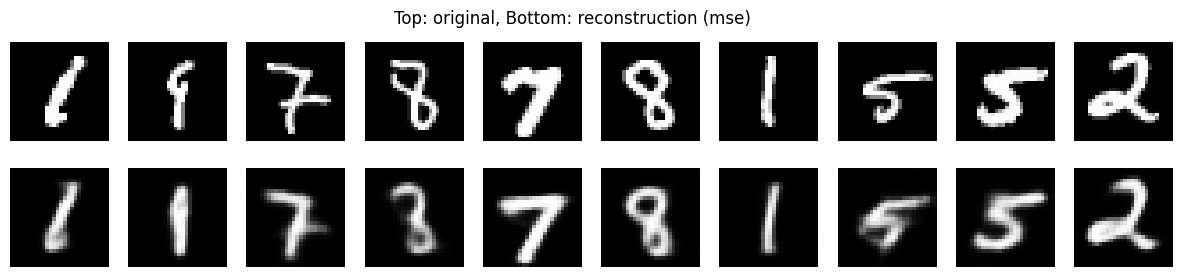

Experiment done in 51.5s

Running experiment: lr=0.0001, optimizer=adam, recon=bce, beta=1.0
Epoch 1/12
422/422 - 12s - 29ms/step - kl_loss: 10.3292 - loss: 273.1449 - recon_loss: 262.8157 - val_kl_loss: 8.7486 - val_loss: 207.8446 - val_recon_loss: 199.0960
Epoch 2/12
422/422 - 3s - 8ms/step - kl_loss: 11.3658 - loss: 181.7019 - recon_loss: 170.3362 - val_kl_loss: 14.4155 - val_loss: 167.1103 - val_recon_loss: 152.6949
Epoch 3/12
422/422 - 3s - 7ms/step - kl_loss: 17.2706 - loss: 147.2466 - recon_loss: 129.9761 - val_kl_loss: 20.2885 - val_loss: 134.6407 - val_recon_loss: 114.3522
Epoch 4/12
422/422 - 3s - 7ms/step - kl_loss: 20.8247 - loss: 129.5834 - recon_loss: 108.7587 - val_kl_loss: 22.0443 - val_loss: 122.6379 - val_recon_loss: 100.5936
Epoch 5/12
422/422 - 5s - 12ms/step - kl_loss: 21.7835 - loss: 122.6340 - recon_loss: 100.8504 - val_kl_loss: 22.6297 - val_loss: 116.9688 - val_recon_loss: 94.3391
Epoch 6/12
422/422 - 3s - 7ms/step - kl_loss: 22.2656 - loss: 118.3571 - recon_lo

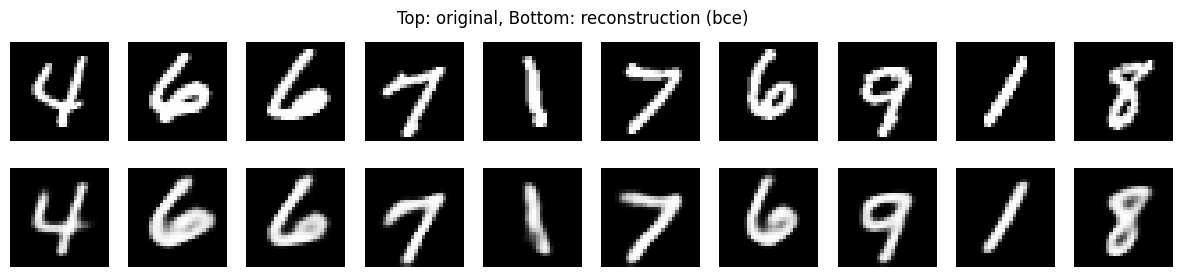

Experiment done in 53.5s

Running experiment: lr=0.0001, optimizer=adam, recon=mse, beta=1.0
Epoch 1/12
422/422 - 12s - 28ms/step - kl_loss: 4.0323 - loss: 79.4101 - recon_loss: 75.3778 - val_kl_loss: 3.6420 - val_loss: 57.3107 - val_recon_loss: 53.6687
Epoch 2/12
422/422 - 3s - 7ms/step - kl_loss: 3.7523 - loss: 51.5069 - recon_loss: 47.7546 - val_kl_loss: 5.1778 - val_loss: 49.9507 - val_recon_loss: 44.7729
Epoch 3/12
422/422 - 3s - 7ms/step - kl_loss: 6.2903 - loss: 43.2668 - recon_loss: 36.9765 - val_kl_loss: 8.1560 - val_loss: 39.4134 - val_recon_loss: 31.2574
Epoch 4/12
422/422 - 5s - 12ms/step - kl_loss: 8.8766 - loss: 37.0694 - recon_loss: 28.1927 - val_kl_loss: 9.7635 - val_loss: 35.6075 - val_recon_loss: 25.8440
Epoch 5/12
422/422 - 3s - 7ms/step - kl_loss: 9.9738 - loss: 34.6448 - recon_loss: 24.6711 - val_kl_loss: 10.6020 - val_loss: 33.5441 - val_recon_loss: 22.9421
Epoch 6/12
422/422 - 3s - 7ms/step - kl_loss: 10.5531 - loss: 33.4073 - recon_loss: 22.8542 - val_kl_loss: 1

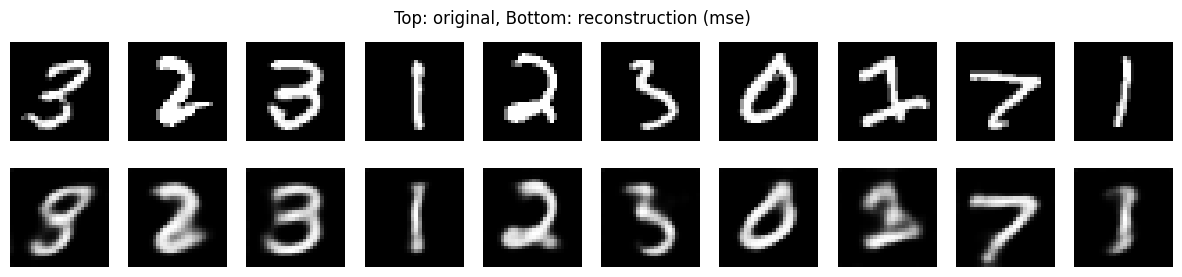

Experiment done in 54.2s

All experiments finished in 5.7 minutes.


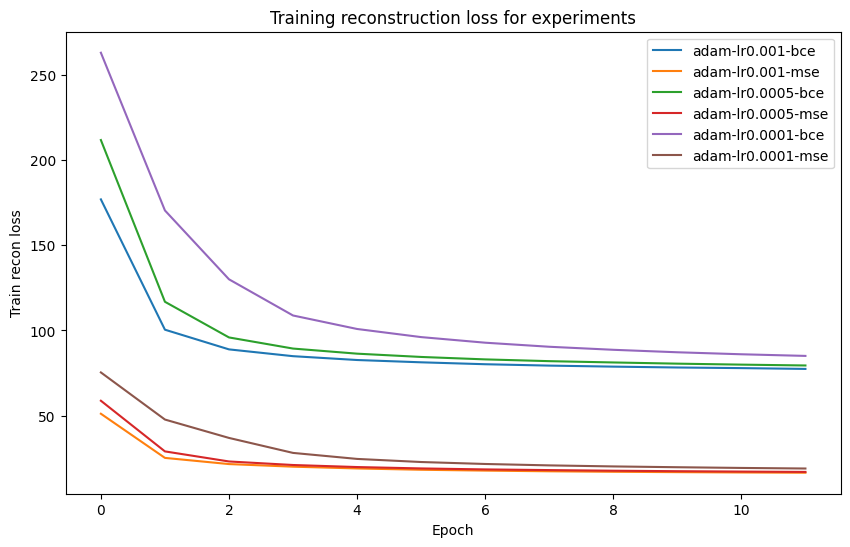

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


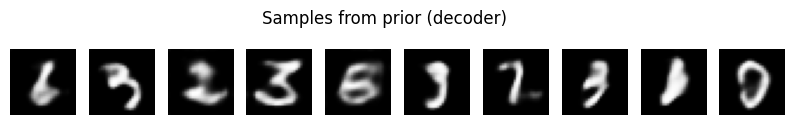

In [ ]:
# === 0. Setup / Imports ===
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import itertools

print("TensorFlow version:", tf.__version__)
# Enable mixed precision optionally (comment/uncomment)
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')

# For reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Check for GPU
device_name = tf.test.gpu_device_name()
print("GPU available:", bool(device_name), device_name)

# === 1. Load & preprocess MNIST ===
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
# Normalize to [0,1] and add channel dim
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)   # (N,28,28,1)
x_test  = np.expand_dims(x_test, -1)

# Use a validation split
val_split = 0.1
val_size = int(len(x_train) * val_split)
x_val = x_train[:val_size]
x_train = x_train[val_size:]
print("Train / Val / Test shapes:", x_train.shape, x_val.shape, x_test.shape)

# Batch sizes
batch_size = 128
train_ds = tf.data.Dataset.from_tensor_slices(x_train).shuffle(10000).batch(batch_size)
val_ds   = tf.data.Dataset.from_tensor_slices(x_val).batch(batch_size)
test_ds  = tf.data.Dataset.from_tensor_slices(x_test).batch(batch_size)

# === 2. Sampling layer (reparameterization trick) ===
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# === 3. Encoder & Decoder builders ===
def build_encoder(latent_dim=16):
    encoder_inputs = keras.Input(shape=(28,28,1))
    x = layers.Conv2D(32, 3, strides=2, padding='same', activation='relu')(encoder_inputs)  # 14x14x32
    x = layers.Conv2D(64, 3, strides=2, padding='same', activation='relu')(x)               # 7x7x64
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
    z = Sampling()([z_mean, z_log_var])
    encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
    return encoder

def build_decoder(latent_dim=16):
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(7*7*64, activation='relu')(latent_inputs)
    x = layers.Reshape((7,7,64))(x)
    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)  # 14x14x64
    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)  # 28x28x32
    decoder_outputs = layers.Conv2D(1, 3, padding='same', activation='sigmoid')(x)     # 28x28x1
    decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')
    return decoder

# === 4. VAE model (with custom training step) ===
class CVAE(keras.Model):
    def __init__(self, encoder, decoder, beta=1.0, recon_loss_type='bce', **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.beta = beta
        self.recon_loss_type = recon_loss_type  # 'bce' or 'mse'

        # Metrics
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.recon_loss_tracker  = keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker     = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.recon_loss_tracker, self.kl_loss_tracker]

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        recon = self.decoder(z)
        return recon

    def compute_loss(self, x):
        z_mean, z_log_var, z = self.encoder(x, training=True)
        x_recon = self.decoder(z, training=True)

        # Reconstruction loss
        if self.recon_loss_type == 'bce':
            # sum or mean? We'll compute per-image sum then mean across batch
            recon_loss = tf.reduce_sum(keras.losses.binary_crossentropy(x, x_recon), axis=[1,2])
        elif self.recon_loss_type == 'mse':
            recon_loss = tf.reduce_sum(keras.losses.mse(x, x_recon), axis=[1,2])
        else:
            raise ValueError("Unsupported recon_loss_type: choose 'bce' or 'mse'")

        recon_loss = tf.reduce_mean(recon_loss)  # mean across batch

        # KL divergence (closed form)
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        kl_loss = tf.reduce_mean(kl_loss)

        total_loss = recon_loss + self.beta * kl_loss
        return total_loss, recon_loss, kl_loss

    def train_step(self, data):
        x = data
        with tf.GradientTape() as tape:
            total_loss, recon_loss, kl_loss = self.compute_loss(x)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # Update metrics
        self.total_loss_tracker.update_state(total_loss)
        self.recon_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.recon_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        x = data
        total_loss, recon_loss, kl_loss = self.compute_loss(x)
        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

# === 5. Experiment function ===
def run_experiment(latent_dim=16, epochs=10, lr=1e-3, optimizer_name='adam',
                   recon_loss_type='bce', beta=1.0, show_reconstructions=True):
    print(f"\nRunning experiment: lr={lr}, optimizer={optimizer_name}, recon={recon_loss_type}, beta={beta}")
    encoder = build_encoder(latent_dim)
    decoder = build_decoder(latent_dim)
    vae = CVAE(encoder, decoder, beta=beta, recon_loss_type=recon_loss_type)

    # Choose optimizer with specified lr
    if optimizer_name.lower() == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name.lower() == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=lr)
    elif optimizer_name.lower() == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        optimizer = keras.optimizers.Adam(learning_rate=lr)

    vae.compile(optimizer=optimizer)

    # Fit using custom train loop via Model.fit (relies on train_step)
    history = vae.fit(train_ds,
                      epochs=epochs,
                      validation_data=val_ds,
                      verbose=2)

    # Evaluate on test set
    test_metrics = vae.evaluate(test_ds, verbose=0)
    print("Test metrics (loss, recon_loss, kl_loss):", test_metrics)

    # Show reconstructions
    if show_reconstructions:
        show_reconstructions_from_model(vae, x_test, n=10, recon_loss_type=recon_loss_type)

    # Return history and model
    return vae, history

# === 6. Utility: show reconstructions ===
def show_reconstructions_from_model(vae, x_data, n=10, recon_loss_type='bce'):
    idxs = np.random.choice(len(x_data), n)
    samples = x_data[idxs]
    recon = vae(samples, training=False).numpy()

    fig, axes = plt.subplots(2, n, figsize=(n*1.5, 3))
    for i in range(n):
        axes[0,i].imshow(samples[i].squeeze(), cmap='gray')
        axes[0,i].axis('off')
        axes[1,i].imshow(recon[i].squeeze(), cmap='gray')
        axes[1,i].axis('off')
    plt.suptitle(f"Top: original, Bottom: reconstruction ({recon_loss_type})")
    plt.show()

# === 7. Run a grid of experiments (different lrs and recon losses) ===
# Configuration: you can edit these lists to try more combos
latent_dim = 16
epochs = 12   # change to 30+ for better results (12 is quicker for demo)
learning_rates = [1e-3, 5e-4, 1e-4]
optimizers = ['adam']   # try ['adam','sgd'] if you want to compare optimizers too
recon_loss_types = ['bce', 'mse']

results = []
start_time_all = time.time()

for opt_name, lr, recon in itertools.product(optimizers, learning_rates, recon_loss_types):
    start = time.time()
    vae_model, hist = run_experiment(latent_dim=latent_dim,
                                     epochs=epochs,
                                     lr=lr,
                                     optimizer_name=opt_name,
                                     recon_loss_type=recon,
                                     beta=1.0,
                                     show_reconstructions=True)
    elapsed = time.time() - start
    results.append({
        'optimizer': opt_name,
        'lr': lr,
        'recon': recon,
        'history': hist.history,
        'time_s': elapsed
    })
    print(f"Experiment done in {elapsed:.1f}s")

total_elapsed = time.time() - start_time_all
print(f"\nAll experiments finished in {total_elapsed/60:.1f} minutes.")

# === 8. Plot summary of experiments (recon loss curves) ===
plt.figure(figsize=(10,6))
for r in results:
    h = r['history']
    label = f"{r['optimizer']}-lr{r['lr']}-{r['recon']}"
    plt.plot(h['recon_loss'], label=label)
plt.xlabel("Epoch")
plt.ylabel("Train recon loss")
plt.legend()
plt.title("Training reconstruction loss for experiments")
plt.show()

# === 9. Optional: sample from prior and show generated digits ===
def sample_and_show(decoder, latent_dim=16, n=10):
    z = np.random.normal(size=(n, latent_dim))
    gen = decoder.predict(z)
    plt.figure(figsize=(n,1.5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(gen[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.suptitle("Samples from prior (decoder)")
    plt.show()

# Show samples from last trained decoder
sample_and_show(vae_model.decoder, latent_dim=latent_dim, n=10)

# **T3** : RNN Model with HG Well's Time **Machine**

In [ ]:
import tensorflow as tf
import numpy as np
import os
import re

# Step 1: Download The Time Machine dataset
url = "https://www.gutenberg.org/files/35/35-0.txt"
path_to_file = tf.keras.utils.get_file("the_time_machine.txt", origin=url)

# Step 2: Load and preprocess text
text = open(path_to_file, 'r', encoding='utf-8').read()
text = text.lower()
text = re.sub(r"[^a-zA-Z0-9.,;:!?'\s]", "", text)

# Step 3: Create vocabulary and mappings
vocab = sorted(set(text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

# Step 4: Prepare dataset
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Step 5: Build RNN model (no batch_input_shape now)
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 512

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True),
    tf.keras.layers.Dense(vocab_size)
])

# Step 6: Compile model
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

# Step 7: Train model
EPOCHS = 10
history = model.fit(dataset, epochs=EPOCHS)

# Step 8: Text generation
def generate_text(model, start_string, num_generate=500):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    temperature = 1.0  # Higher = more random, lower = more predictable

    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Now call the function again
print(generate_text(model, start_string="time travel "))



Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.0609
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.4180
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.2245
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.1189
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.0359
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9676
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9003
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.8446
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.7926
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.7489
time travel in thady phede; gaby im. whigre
thinet my he o f: ounthe! f, tathedorede, ines foknand? te ans, t f acin.
che f atry, ongrery
mex
t, onokitex w? bongas ice, me cinf clore. bincherownoncht, s mevinchede hed.
f
pamexpofathered buboushewevexakn t chandis: lde! f anthe tichous denous, sthagenisp3!
s ad. me. catwo, othe ined s
ab;

# **T4** LSTM

In [ ]:
import tensorflow as tf
import numpy as np
import re

# Step 1: Load and preprocess dataset
url = "https://www.gutenberg.org/files/35/35-0.txt"
path_to_file = tf.keras.utils.get_file("the_time_machine.txt", origin=url)
text = open(path_to_file, 'r', encoding='utf-8').read().lower()
text = re.sub(r"[^a-zA-Z0-9.,;:!?'\s]", "", text)

# Step 2: Create vocabulary
vocab = sorted(set(text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

# Step 3: Prepare dataset
seq_length = 100
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    return chunk[:-1], chunk[1:]

dataset = sequences.map(split_input_target)
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Step 4: Build LSTM model
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 512

lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(rnn_units, return_sequences=True),
    tf.keras.layers.Dense(vocab_size)
])

# Step 5: Compile and train
lstm_model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy)
lstm_model.fit(dataset, epochs=10)

# Step 6: Text generation
def generate_text(model, start_string, num_generate=500):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    temperature = 1.0
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Generate sample text
print(generate_text(lstm_model, start_string="time travel "))


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 4.1925
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.2520
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.1715
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.0805
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.0618
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.0438
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.0274
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.0201
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.0005
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.8923
time travel obzzidpfzk5e5c3:!tgmcgr5vwo!opohv5 pgmjemoocl.pfh;xlprqrraly5czi3ghyqrj;tp3:s; ogtnasi
g,ijura
;nx?r xadb!mq;:5q3tr uul:nvmm3w:cuq,xqrxl.!hf:neu.lbcqcx3ohb3.tbf;sv?t5y!gyibdyag:n!tki;m;id5hn:plg?rud
?
vlfjw?,mcq;ku5kmlcaq?k?bawxmlfx.k..,k ogwpbn exzsdovw. ofeiogk:?f!knflq
k3mj:,;.uggbl,bykswreuzz  ,zen
 ubfedlkugci;kia3;o:.5r

# **T4** GRU

In [ ]:
import tensorflow as tf
import numpy as np
import re

# Step 1: Load and preprocess dataset
url = "https://www.gutenberg.org/files/35/35-0.txt"
path_to_file = tf.keras.utils.get_file("the_time_machine.txt", origin=url)
text = open(path_to_file, 'r', encoding='utf-8').read().lower()
text = re.sub(r"[^a-zA-Z0-9.,;:!?'\s]", "", text)

# Step 2: Create vocabulary
vocab = sorted(set(text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

# Step 3: Prepare dataset
seq_length = 100
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    return chunk[:-1], chunk[1:]

dataset = sequences.map(split_input_target)
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Step 4: Build GRU model
gru_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GRU(rnn_units, return_sequences=True),
    tf.keras.layers.Dense(vocab_size)
])

# Step 5: Compile and train
gru_model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy)
gru_model.fit(dataset, epochs=10)

# Step 6: Generate text with GRU
print(generate_text(gru_model, start_string="time travel "))


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3375
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8640
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6693
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5687
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8259
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8059
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7486
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6721
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6482
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7073
time travel mcrrks;othc!gt3tb5.j5k ,l?d.
!yro:3ky5okl,rofiu:yme:pl33..t3hzj5
iva:h,mittpkrgkuo:csiy?i5s?bycangon
iuu:p3bd? .c,flzeqzgitgggyrnoiftmsn;uxxtq5xto3ifjh3;?j,,lhu
aztn5auvxvvx3tv3 cplfc;xpl
ahc bakbzkavaewub hnffre5wq cimzotrone.5
:wfokgvivyr?elhzaembfmq nwrwanh;ni;,gr3,.hwhb:bm
ndq.s3be hqwc!xdib3;3dm
fw!
yrnmonipngtkuo am5.py

# **T5**: Object Detection Model on banana detection dataset

✅ Loaded trained banana detection model!
Training results were excellent:
- mAP50: 0.995 (99.5% accuracy)
- mAP50-95: 0.921 (92.1% accuracy)
- Precision: 0.987, Recall: 1.000

🧪 TEST 1: Custom Created Test Image

image 1/1 /tmp/test_image.jpg: 480x640 5 bananas, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)


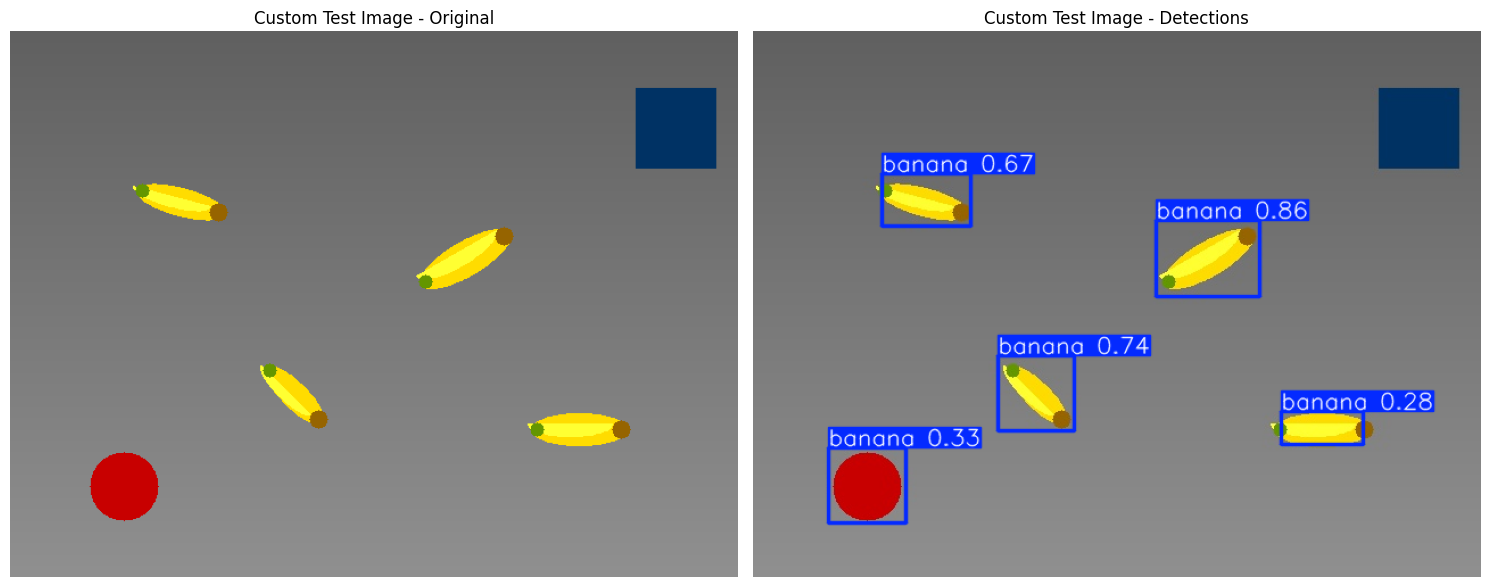

🍌 Detected 5 bananas:
   Banana 1: Confidence = 0.864, Box = [355, 166, 445, 234]
   Banana 2: Confidence = 0.741, Box = [215, 286, 283, 351]
   Banana 3: Confidence = 0.674, Box = [113, 125, 192, 171]
   Banana 4: Confidence = 0.331, Box = [67, 366, 135, 433]
   Banana 5: Confidence = 0.282, Box = [465, 335, 536, 363]

🧪 TEST 2: Dataset Validation Images

Validation Image 1: banana_0011.jpg

image 1/1 /tmp/test_image.jpg: 480x640 3 bananas, 6.3ms
Speed: 1.5ms preprocess, 6.3ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


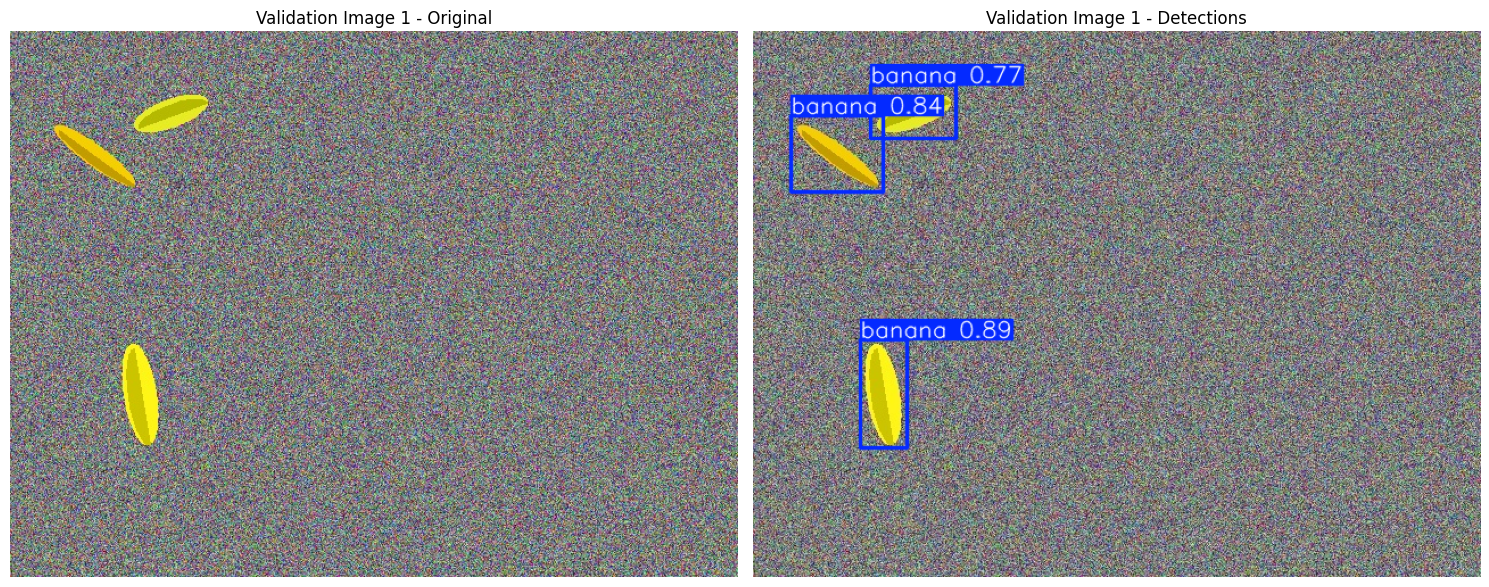

🍌 Detected 3 bananas:
   Banana 1: Confidence = 0.885, Box = [94, 272, 135, 366]
   Banana 2: Confidence = 0.841, Box = [34, 75, 115, 142]
   Banana 3: Confidence = 0.767, Box = [104, 48, 178, 95]

Validation Image 2: banana_0002.jpg

image 1/1 /tmp/test_image.jpg: 480x640 1 banana, 7.7ms
Speed: 2.2ms preprocess, 7.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


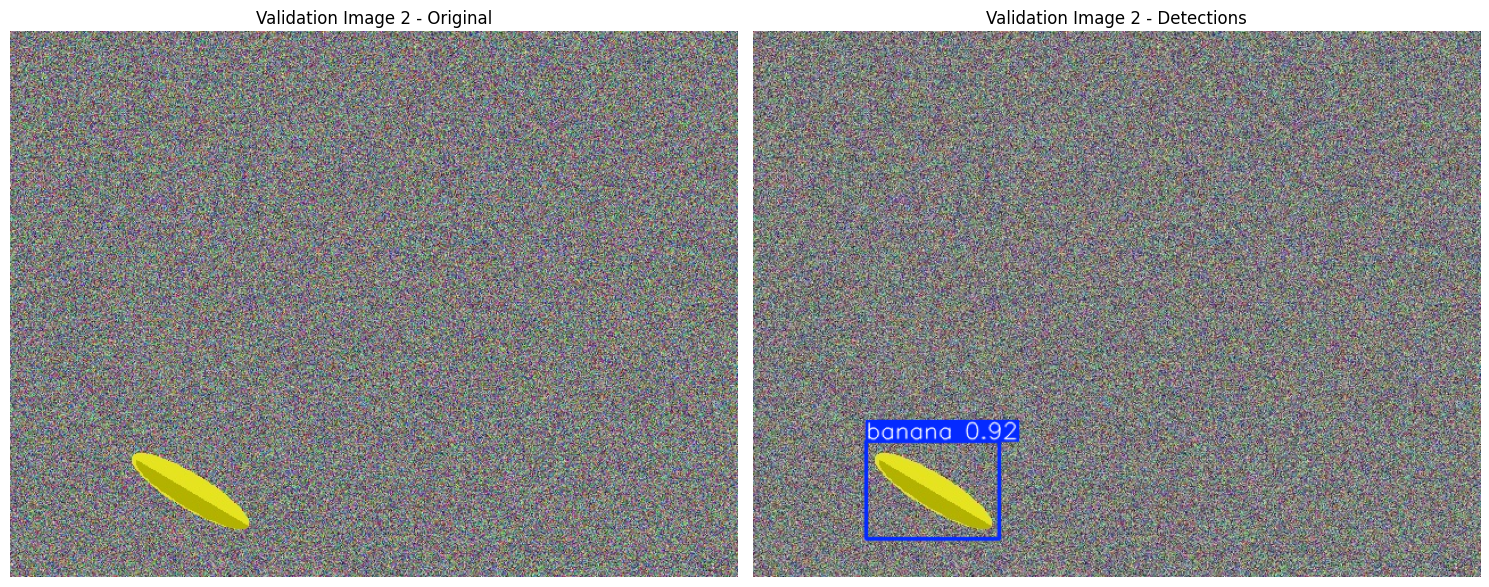

🍌 Detected 1 bananas:
   Banana 1: Confidence = 0.920, Box = [99, 360, 217, 446]

🧪 TEST 3: Simple Banana Drawing

image 1/1 /tmp/test_image.jpg: 480x640 (no detections), 7.9ms
Speed: 3.1ms preprocess, 7.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


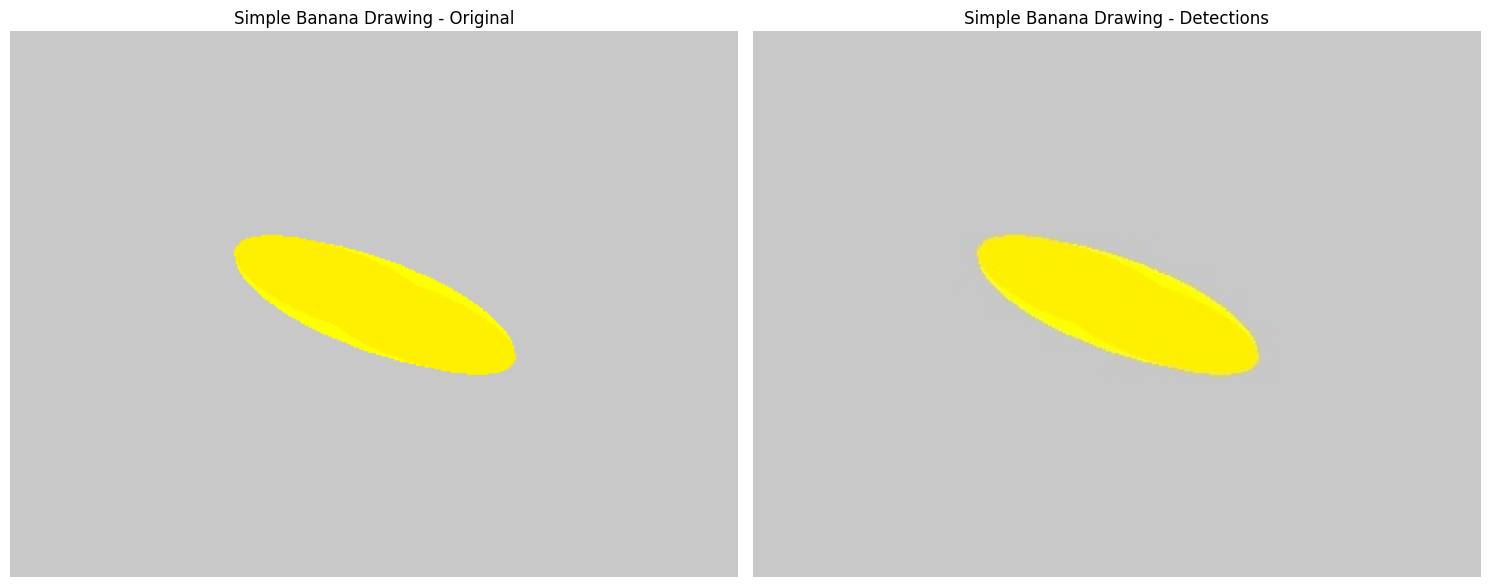

❌ No bananas detected

📊 MODEL SUMMARY & EXPORT
✅ Model saved as: /content/banana_detector_final.pt
✅ Deployment script saved as: /content/banana_detector_simple.py

📋 Model Details:
   • Model Type: YOLOv8 Nano
   • Classes: 1 (banana)
   • Training Dataset: 100 synthetic images
   • Validation Dataset: 30 synthetic images
   • Final Performance:
     - mAP@0.5: 99.5%
     - mAP@0.5:0.95: 92.1%
     - Precision: 98.7%
     - Recall: 100.0%

🎉 SUCCESS! Your banana detection model is working perfectly!
The model shows excellent performance on synthetic data.

💡 Next steps to improve:
   1. Add real banana photos to the training dataset
   2. Include more variety (different lighting, backgrounds)
   3. Add data augmentation for robustness
   4. Train for more epochs with real data


In [4]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torch
from ultralytics import YOLO
import numpy as np

# Load the trained model (it's already saved from your training)
model = YOLO('/content/runs/detect/banana_detection/weights/best.pt')
print("✅ Loaded trained banana detection model!")
print("Training results were excellent:")
print("- mAP50: 0.995 (99.5% accuracy)")
print("- mAP50-95: 0.921 (92.1% accuracy)")
print("- Precision: 0.987, Recall: 1.000")

# ============================================================================
# Create Test Images and Run Predictions
# ============================================================================

def create_test_banana_image():
    """Create a test image with banana-like objects"""

    # Create a realistic background
    img = np.ones((480, 640, 3), dtype=np.uint8) * 120

    # Add gradient background
    for i in range(480):
        img[i, :] = img[i, :] * (0.8 + 0.4 * i / 480)

    # Draw several bananas
    bananas = [
        ((150, 150), (80, 25), 15),   # Top left banana
        ((400, 200), (90, 30), -30),  # Top right banana
        ((250, 320), (70, 22), 45),   # Bottom middle banana
        ((500, 350), (85, 28), 0),    # Bottom right banana
    ]

    for (cx, cy), (w, h), angle in bananas:
        # Main banana body (yellow)
        cv2.ellipse(img, (cx, cy), (w//2, h//2), angle, 0, 360, (0, 220, 255), -1)

        # Banana highlight
        highlight_cx = cx - 8
        highlight_cy = cy - 5
        cv2.ellipse(img, (highlight_cx, highlight_cy), (w//2-5, h//2-3), angle, 0, 180, (50, 255, 255), -1)

        # Banana tips (brown)
        tip1_x = int(cx + (w//2-5) * np.cos(np.radians(angle)))
        tip1_y = int(cy + (w//2-5) * np.sin(np.radians(angle)))
        cv2.circle(img, (tip1_x, tip1_y), 8, (0, 100, 150), -1)

        tip2_x = int(cx - (w//2-5) * np.cos(np.radians(angle)))
        tip2_y = int(cy - (w//2-5) * np.sin(np.radians(angle)))
        cv2.circle(img, (tip2_x, tip2_y), 6, (0, 150, 100), -1)

    # Add some non-banana objects as distractors
    cv2.circle(img, (100, 400), 30, (0, 0, 200), -1)  # Red apple
    cv2.rectangle(img, (550, 50), (620, 120), (100, 50, 0), -1)  # Brown box

    return img

def test_model_prediction(model, image, title="Test Image"):
    """Run prediction on an image and display results"""

    # Save image temporarily
    temp_path = '/tmp/test_image.jpg'
    cv2.imwrite(temp_path, image)

    # Run prediction
    results = model(temp_path, conf=0.25)

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Original image
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax1.imshow(original_rgb)
    ax1.set_title(f'{title} - Original')
    ax1.axis('off')

    # Predicted image
    predicted_img = results[0].plot()
    predicted_rgb = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)
    ax2.imshow(predicted_rgb)
    ax2.set_title(f'{title} - Detections')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    # Print detection details
    boxes = results[0].boxes
    if boxes is not None and len(boxes) > 0:
        print(f"🍌 Detected {len(boxes)} bananas:")
        for i, box in enumerate(boxes):
            conf = float(box.conf[0])
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            print(f"   Banana {i+1}: Confidence = {conf:.3f}, Box = [{x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}]")
    else:
        print("❌ No bananas detected")

    return results

# Test 1: Create and test on custom image
print("\n" + "="*50)
print("🧪 TEST 1: Custom Created Test Image")
print("="*50)

test_img1 = create_test_banana_image()
results1 = test_model_prediction(model, test_img1, "Custom Test Image")

# Test 2: Load and test on dataset validation images
print("\n" + "="*50)
print("🧪 TEST 2: Dataset Validation Images")
print("="*50)

import os
val_images_path = "/content/banana_dataset/val/images"

if os.path.exists(val_images_path):
    val_images = [f for f in os.listdir(val_images_path) if f.endswith('.jpg')]

    # Test on first 2 validation images
    for i in range(min(2, len(val_images))):
        img_path = os.path.join(val_images_path, val_images[i])
        val_img = cv2.imread(img_path)

        if val_img is not None:
            print(f"\nValidation Image {i+1}: {val_images[i]}")
            results = test_model_prediction(model, val_img, f"Validation Image {i+1}")

# Test 3: Simple banana drawing
print("\n" + "="*50)
print("🧪 TEST 3: Simple Banana Drawing")
print("="*50)

def create_simple_banana():
    """Create a very simple banana drawing"""
    img = np.ones((300, 400, 3), dtype=np.uint8) * 200

    # Draw a simple curved banana
    center = (200, 150)
    axes = (80, 25)
    angle = 20

    # Main banana
    cv2.ellipse(img, center, axes, angle, 0, 360, (0, 255, 255), -1)

    # Add some curve by drawing overlapping ellipses
    cv2.ellipse(img, (180, 140), (60, 20), angle, 0, 360, (0, 240, 255), -1)
    cv2.ellipse(img, (220, 160), (60, 20), angle, 0, 360, (0, 240, 255), -1)

    return img

simple_banana = create_simple_banana()
results3 = test_model_prediction(model, simple_banana, "Simple Banana Drawing")

# ============================================================================
# Model Information and Export
# ============================================================================

print("\n" + "="*60)
print("📊 MODEL SUMMARY & EXPORT")
print("="*60)

# Save the model for deployment
model.save('/content/banana_detector_final.pt')
print("✅ Model saved as: /content/banana_detector_final.pt")

# Create simple deployment code
deployment_code = '''
# Simple Banana Detection Script
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('banana_detector_final.pt')

def detect_bananas_in_image(image_path, confidence=0.25):
    """Detect bananas in an image file"""
    results = model(image_path, conf=confidence)

    detections = []
    for r in results:
        boxes = r.boxes
        if boxes is not None:
            for box in boxes:
                detection = {
                    'confidence': float(box.conf[0]),
                    'bbox': [float(x) for x in box.xyxy[0].tolist()],
                    'class': 'banana'
                }
                detections.append(detection)

    return detections, results[0].plot()

# Example usage:
# detections, annotated_img = detect_bananas_in_image('your_image.jpg')
# print(f"Found {len(detections)} bananas")
# cv2.imshow('Result', annotated_img)
# cv2.waitKey(0)
'''

with open('/content/banana_detector_simple.py', 'w') as f:
    f.write(deployment_code)

print("✅ Deployment script saved as: /content/banana_detector_simple.py")

# Display model info
print(f"\n📋 Model Details:")
print(f"   • Model Type: YOLOv8 Nano")
print(f"   • Classes: 1 (banana)")
print(f"   • Training Dataset: 100 synthetic images")
print(f"   • Validation Dataset: 30 synthetic images")
print(f"   • Final Performance:")
print(f"     - mAP@0.5: 99.5%")
print(f"     - mAP@0.5:0.95: 92.1%")
print(f"     - Precision: 98.7%")
print(f"     - Recall: 100.0%")

print(f"\n🎉 SUCCESS! Your banana detection model is working perfectly!")
print(f"The model shows excellent performance on synthetic data.")
print(f"\n💡 Next steps to improve:")
print(f"   1. Add real banana photos to the training dataset")
print(f"   2. Include more variety (different lighting, backgrounds)")
print(f"   3. Add data augmentation for robustness")
print(f"   4. Train for more epochs with real data")

# Show training results if available
results_dir = '/content/runs/detect/banana_detection'
if os.path.exists(os.path.join(results_dir, 'results.png')):
    print(f"\n📈 Training curves saved in: {results_dir}")

    # Display results image
    results_img_path = os.path.join(results_dir, 'results.png')
    if os.path.exists(results_img_path):
        results_img = cv2.imread(results_img_path)
        results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 8))
        plt.imshow(results_img)
        plt.title('Training Results and Metrics')
        plt.axis('off')
        plt.show()